In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import requests
import pandas as pd

In [2]:
df = pd.read_csv('data_with_doc2vec.csv')

In [3]:
print(df.head)

<bound method NDFrame.head of                                                    Title        Date       CP  \
0       JPMorgan Predicts 2008 Will Be "Nothing But Net"  2008-01-02  1447.16   
1      Dow Tallies Biggest First-session-of-year Poin...  2008-01-02  1447.16   
2                       2008 predictions for the S&P 500  2008-01-02  1447.16   
3      U.S. Stocks Higher After Economic Data, Monsan...  2008-01-03  1447.16   
4      U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18   
...                                                  ...         ...      ...   
19122          REITs vs. Stocks: What Does the Data Say?  2024-03-04  5130.95   
19123  Nasdaq Index, Dow Jones, S&P 500 News: Futures...  2024-03-04  5130.95   
19124  Nasdaq 100, Dow Jones, S&P 500 News: Cautious ...  2024-03-04  5130.95   
19125  Bank of America boosts S&P 500 target to 5,400...  2024-03-04  5130.95   
19126  S&P 500 Gains and Losses Today: Tesla Shares T...  2024-03-04  5130.95  

In [4]:
df.shape

(19127, 104)

In [5]:
df2 = pd.read_csv("add_lexicon_sentiment_to_headlines.csv")
df2 = df2.drop(columns=["ma5", "return", "target", "CP", "Date", "next_close"]).drop_duplicates()
print(df2.shape)

(18049, 3)


In [6]:
merged_df = pd.merge(df, df2, on='Title')

In [7]:
print(df.shape)
print(merged_df.shape)

(19127, 104)
(19122, 106)


In [8]:
print(merged_df.head)

<bound method NDFrame.head of                                                    Title        Date       CP  \
0      U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18   
1      How Investing in Intangibles -- Like Employee ...  2008-01-09  1409.13   
2             Head And Shoulders Top Bodes Ill For Bulls  2008-01-09  1409.13   
3      U.S. Stocks Zigzag Higher As Bernanke Speech S...  2008-01-10  1420.33   
4      It's a Black Monday as stock markets tank in e...  2008-01-22  1310.50   
...                                                  ...         ...      ...   
19117  Workday falls after missing the cut for S&P 50...  2024-03-04  5130.95   
19118          REITs vs. Stocks: What Does the Data Say?  2024-03-04  5130.95   
19119  Nasdaq Index, Dow Jones, S&P 500 News: Futures...  2024-03-04  5130.95   
19120  Nasdaq 100, Dow Jones, S&P 500 News: Cautious ...  2024-03-04  5130.95   
19121  Bank of America boosts S&P 500 target to 5,400...  2024-03-04  5130.95  

In [9]:
print(merged_df.columns)

Index(['Title', 'Date', 'CP', 'Title_Vector', 'doc2vec_1', 'doc2vec_2',
       'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6',
       ...
       'doc2vec_93', 'doc2vec_94', 'doc2vec_95', 'doc2vec_96', 'doc2vec_97',
       'doc2vec_98', 'doc2vec_99', 'doc2vec_100', 'sent_sum', 'sent_avg'],
      dtype='object', length=106)


In [10]:
merged_df['Date_Updated'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date_Updated', inplace=True)
merged_df.sort_index(inplace=True)

In [11]:
print(merged_df.head)

<bound method NDFrame.head of                                                           Title        Date  \
Date_Updated                                                                  
2008-01-07    U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07   
2008-01-09    How Investing in Intangibles -- Like Employee ...  2008-01-09   
2008-01-09           Head And Shoulders Top Bodes Ill For Bulls  2008-01-09   
2008-01-10    U.S. Stocks Zigzag Higher As Bernanke Speech S...  2008-01-10   
2008-01-22    It's a Black Monday as stock markets tank in e...  2008-01-22   
...                                                         ...         ...   
2024-03-04    Workday falls after missing the cut for S&P 50...  2024-03-04   
2024-03-04            REITs vs. Stocks: What Does the Data Say?  2024-03-04   
2024-03-04    Nasdaq Index, Dow Jones, S&P 500 News: Futures...  2024-03-04   
2024-03-04    Nasdaq 100, Dow Jones, S&P 500 News: Cautious ...  2024-03-04   
2024-03-04    Bank of 

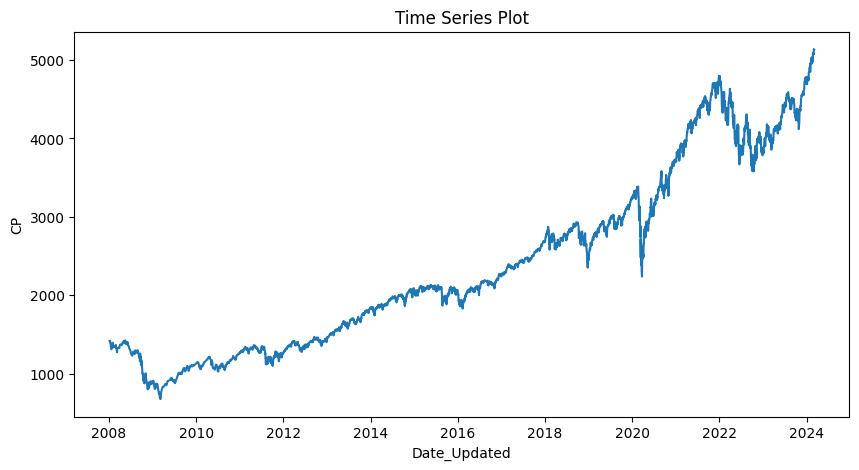

In [12]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(merged_df['CP'])
plt.title('Time Series Plot')
plt.xlabel('Date_Updated')
plt.ylabel('CP')
plt.show()

In [13]:
column_names_list = merged_df.columns.tolist()
print(column_names_list)

['Title', 'Date', 'CP', 'Title_Vector', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'do

In [14]:
interaction_df = pd.DataFrame()

for i in range(1, 101):
    interaction_df[f'sent_sum_doc2vec_{i}'] = merged_df['sent_sum'] * merged_df[f'doc2vec_{i}']
    interaction_df[f'sent_avg_doc2vec_{i}'] = merged_df['sent_avg'] * merged_df[f'doc2vec_{i}']

# Concatenate interaction features all at once
merged_df = pd.concat([merged_df, interaction_df], axis=1)

# Make a copy to defragment and improve performance
merged_df = merged_df.copy()

C:\Users\georg\AppData\Local\Temp\ipykernel_8204\2837349153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_df[f'sent_sum_doc2vec_{i}'] = merged_df['sent_sum'] * merged_df[f'doc2vec_{i}']
C:\Users\georg\AppData\Local\Temp\ipykernel_8204\2837349153.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  interaction_df[f'sent_avg_doc2vec_{i}'] = merged_df['sent_avg'] * merged_df[f'doc2vec_{i}']
C:\Users\georg\AppData\Local\Temp\ipykernel_8204\2837349153.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

In [15]:
# Drop "Title_Vector"
merged_df = merged_df.drop(columns=['Title_Vector'])

# Group by Date index, concatenate Title strings separated by "; ", sum all other columns
df_combined = merged_df.groupby(merged_df.index).agg(
    {
        'Title': lambda x: '; '.join(x),
        'CP': 'mean',
        **{col: 'sum' for col in merged_df.columns if col not in ['Title', 'CP', 'Date']}
    }
)


# df_combined now has combined features by date, with Title concatenated and no Title_Vector
print(df_combined.head())

                                                          Title       CP  \
Date_Updated                                                               
2008-01-07    U.S. Stocks Climb As Hopes Increase For More F...  1416.18   
2008-01-09    How Investing in Intangibles -- Like Employee ...  1409.13   
2008-01-10    U.S. Stocks Zigzag Higher As Bernanke Speech S...  1420.33   
2008-01-22    It's a Black Monday as stock markets tank in e...  1310.50   
2008-01-29    Former Connecticut hedge fund exec sues in son...  1362.30   

              doc2vec_1  doc2vec_2  doc2vec_3  doc2vec_4  doc2vec_5  \
Date_Updated                                                          
2008-01-07    -0.010123  -0.040911   0.018438  -0.059596   0.042441   
2008-01-09    -0.014567   0.069640   0.087747   0.065043   0.087881   
2008-01-10    -0.029914   0.013458   0.015252  -0.051862   0.036416   
2008-01-22    -0.011182   0.113825   0.274587  -0.006015   0.110841   
2008-01-29    -0.048532   0.009175   0.05

In [16]:
print(df_combined.shape)
column_names_list = df_combined.columns.tolist()
print(column_names_list)

(3505, 304)
['Title', 'CP', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'doc2vec_70', '

In [17]:
for i in range(1321,1351):
    print(df_combined["sent_sum_doc2vec_25"][i], "  =  ", df_combined["sent_sum"][i], "   x   ", df_combined["doc2vec_25"][i])

-0.075538299   =   -1.2    x    0.16124908300000002
0.0   =   0.0    x    -0.057560109
-0.0098784498   =   -0.6    x    0.043121949
0.0   =   0.0    x    0.0065940575999999945
-0.0376234506   =   -1.7999999999999998    x    0.12475188400000001
0.0283410942   =   -0.6    x    -0.047235157
-0.0783411048   =   -2.4    x    0.12204165300000001
0.0   =   0.0    x    -0.05714593885
0.0   =   0.0    x    -0.054441538
0.0   =   0.0    x    0.0845032
0.0208322232   =   -1.2    x    -0.017451609999999992
0.0   =   0.0    x    0.052439074
0.0195950724   =   -0.6    x    -0.039816686
-0.06902534444   =   -1.2999999999999998    x    0.11406103420000001
0.03938922   =   -0.4    x    0.291146221
0.0   =   0.0    x    0.036899388
0.016604057399999997   =   -1.2    x    -0.047583837000000004
-0.040116682380000004   =   -1.7999999999999998    x    0.4372712973
0.016274037   =   -1.0    x    -0.028364264
-0.029939651999999997   =   -0.6    x    -0.026719533000000004
0.010403958000000005   =   -1.2    x  

C:\Users\georg\AppData\Local\Temp\ipykernel_8204\3935394514.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_combined["sent_sum_doc2vec_25"][i], "  =  ", df_combined["sent_sum"][i], "   x   ", df_combined["doc2vec_25"][i])


In [18]:
df_combined = df_combined.sort_index()
lags = range(1, 11)
doc2vec_range = range(1, 101)

# Columns to lag
cols_to_lag = ['CP', 'sent_sum', 'sent_avg'] + \
              [f'doc2vec_{i}' for i in doc2vec_range] + \
              [f'sent_sum_doc2vec_{i}' for i in doc2vec_range] + \
              [f'sent_avg_doc2vec_{i}' for i in doc2vec_range]

# Create lagged features
for lag in lags:
    shifted = df_combined[cols_to_lag].shift(lag)
    shifted.columns = [f'{col}_lag_{lag}' for col in shifted.columns]
    df_combined = pd.concat([df_combined, shifted], axis=1)

In [19]:
column_names_list = df_combined.columns.tolist()
print(df_combined.shape)
print(column_names_list)


(3505, 3334)
['Title', 'CP', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'doc2vec_70', 

In [20]:
# List of base columns to create moving averages for
base_cols = ['sent_sum', 'sent_avg']

# Add doc2vec columns
doc2vec_cols = [f'doc2vec_{i}' for i in range(1, 101)]

# Interaction columns
sent_sum_inter_cols = [f'sent_sum_doc2vec_{i}' for i in range(1, 101)]
sent_avg_inter_cols = [f'sent_avg_doc2vec_{i}' for i in range(1, 101)]

# Combine all
all_cols = base_cols + doc2vec_cols + sent_sum_inter_cols + sent_avg_inter_cols

# Calculate moving averages for each column
for col in all_cols:
    df_combined[f'{col}_ma5'] = df_combined[col].rolling(window=5, min_periods=1).mean()
    df_combined[f'{col}_ma10'] = df_combined[col].rolling(window=10, min_periods=1).mean()
    df_combined[f'{col}_ma30'] = df_combined[col].rolling(window=30, min_periods=1).mean()

C:\Users\georg\AppData\Local\Temp\ipykernel_8204\2452178246.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined[f'{col}_ma10'] = df_combined[col].rolling(window=10, min_periods=1).mean()
C:\Users\georg\AppData\Local\Temp\ipykernel_8204\2452178246.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_combined[f'{col}_ma30'] = df_combined[col].rolling(window=30, min_periods=1).mean()
C:\Users\georg\AppData\Local\Temp\ipykernel_8204\2452178246.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

In [21]:
print(df_combined.head)

<bound method NDFrame.head of                                                           Title       CP  \
Date_Updated                                                               
2008-01-07    U.S. Stocks Climb As Hopes Increase For More F...  1416.18   
2008-01-09    How Investing in Intangibles -- Like Employee ...  1409.13   
2008-01-10    U.S. Stocks Zigzag Higher As Bernanke Speech S...  1420.33   
2008-01-22    It's a Black Monday as stock markets tank in e...  1310.50   
2008-01-29    Former Connecticut hedge fund exec sues in son...  1362.30   
...                                                         ...      ...   
2024-02-27    Barclays raises S&P 500 target to 5300; S&P 50...  5078.18   
2024-02-28    Understanding Notional Value and How It Works;...  5069.76   
2024-02-29    S&P 500 Price Forecast – Stock Market Continue...  5096.27   
2024-03-01    S&P 500, Nasdaq 100: Positive Returns in March...  5137.08   
2024-03-04    S&P 500: Super Micro, Deckers Jump On News T

In [22]:
api_key = 'a3d20438f245e7e3024b870c1ba71557'

In [23]:
series_id = 'DFF'  # Effective Federal Funds Rate (daily)
url = 'https://api.stlouisfed.org/fred/series/observations'

params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': '2008-01-01',
    'observation_end': '2024-12-31'
}

response = requests.get(url, params=params)
data = response.json()

# Parse into DataFrame
obs = data.get('observations', [])

effr = pd.DataFrame(obs)

# Convert date and value columns
if not df.empty:
    effr['date'] = pd.to_datetime(effr['date'])
    effr['value'] = pd.to_numeric(effr['value'], errors='coerce')

# Show first few rows
print(effr.head())

  realtime_start realtime_end       date  value
0     2025-08-07   2025-08-07 2008-01-01   3.06
1     2025-08-07   2025-08-07 2008-01-02   4.11
2     2025-08-07   2025-08-07 2008-01-03   4.25
3     2025-08-07   2025-08-07 2008-01-04   4.18
4     2025-08-07   2025-08-07 2008-01-05   4.18


In [24]:
def get_release_dates(release_id, api_key, start_date, end_date):
    url = 'https://api.stlouisfed.org/fred/release/dates'
    params = {
        'release_id': release_id,
        'api_key': api_key,
        'file_type': 'json',
        'realtime_start': start_date,
        'realtime_end': end_date
    }
    response = requests.get(url, params=params)
    data = response.json()
    dates = data.get('release_dates', [])
    df = pd.DataFrame(dates)
    df['date'] = pd.to_datetime(df['date'])
    return df


unemp_release_dates = get_release_dates(14, api_key, '2008-01-01', '2024-01-01')
cpi_release_dates = get_release_dates(9, api_key, '2008-01-01', '2024-01-01')

print(unemp_release_dates.head())
print(cpi_release_dates.head())

   release_id       date
0          14 2008-01-08
1          14 2008-02-07
2          14 2008-03-07
3          14 2008-04-07
4          14 2008-05-07
   release_id       date
0           9 2008-01-15
1           9 2008-02-13
2           9 2008-03-13
3           9 2008-04-14
4           9 2008-04-30


In [25]:
def get_series_data(series_id, api_key, start_date, end_date):
    url = 'https://api.stlouisfed.org/fred/series/observations'
    params = {
        'series_id': series_id,
        'api_key': api_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    response = requests.get(url, params=params)
    data = response.json()
    observations = data.get('observations', [])
    df = pd.DataFrame(observations)
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    return df

unemp_df = get_series_data('UNRATE', api_key, '2008-01-01', '2024-01-01')
cpi_df = get_series_data('CPIAUCSL', api_key, '2008-01-01', '2024-01-01')

In [26]:
print(cpi_df.head())

  realtime_start realtime_end       date    value
0     2025-08-04   2025-08-04 2008-01-01  212.174
1     2025-08-04   2025-08-04 2008-02-01  212.687
2     2025-08-04   2025-08-04 2008-03-01  213.448
3     2025-08-04   2025-08-04 2008-04-01  213.942
4     2025-08-04   2025-08-04 2008-05-01  215.208


In [27]:
def prepare_series_data(release_dates_df, series_df, release_id):
    # Filter release dates for the specific release_id
    releases = release_dates_df[release_dates_df['release_id'] == release_id].copy()
    releases.rename(columns={'date': 'release_date'}, inplace=True)
    
    # Add release_id column explicitly if missing
    releases['release_id'] = release_id
    
    # Sort for merge_asof
    releases = releases.sort_values('release_date')
    series_df = series_df.sort_values('date').rename(columns={'date': 'value_date'})
    
    # Merge using merge_asof: for each value_date, find the closest release_date <= value_date
    merged = pd.merge_asof(series_df, releases, left_on='value_date', right_on='release_date', direction='backward')
    
    # Drop rows with missing release_date to avoid merge errors
    merged = merged.dropna(subset=['release_date'])
    
    # Create daily date range covering from earliest to latest release_date
    full_dates = pd.date_range(merged['release_date'].min(), merged['release_date'].max(), freq='D')
    daily_df = pd.DataFrame({'release_date': full_dates})
    
    # Merge daily dates with merged data on release_date
    daily_merged = pd.merge_asof(daily_df, merged.sort_values('release_date'), on='release_date', direction='backward')
    
    # Forward fill values for days between releases
    daily_merged['value'] = daily_merged['value'].ffill()
    
    # Keep only necessary columns
    daily_merged = daily_merged[['release_date', 'release_id', 'value_date', 'value']]
    
    return daily_merged

In [28]:
df_combined.head()

,Title,CP,doc2vec_1,doc2vec_2,doc2vec_3,doc2vec_4,doc2vec_5,doc2vec_6,doc2vec_7,doc2vec_8,...,sent_avg_doc2vec_97_ma30,sent_avg_doc2vec_98_ma5,sent_avg_doc2vec_98_ma10,sent_avg_doc2vec_98_ma30,sent_avg_doc2vec_99_ma5,sent_avg_doc2vec_99_ma10,sent_avg_doc2vec_99_ma30,sent_avg_doc2vec_100_ma5,sent_avg_doc2vec_100_ma10,sent_avg_doc2vec_100_ma30
Date_Updated,,,,,,,,,,,,,,,,,,,,,
2008-01-07,U.S. Stocks Climb As Hopes Increase For More F...,1416.18,-0.010123,-0.040911,0.018438,-0.059596,0.042441,0.056240,0.044169,0.012315,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-09,How Investing in Intangibles -- Like Employee ...,1409.13,-0.014567,0.069640,0.087747,0.065043,0.087881,-0.108294,0.255230,0.263246,...,0.000072,-0.001425,-0.001425,-0.001425,-0.004611,-0.004611,-0.004611,-0.001326,-0.001326,-0.001326
2008-01-10,U.S. Stocks Zigzag Higher As Bernanke Speech S...,1420.33,-0.029914,0.013458,0.015252,-0.051862,0.036416,-0.008594,0.018927,0.082180,...,0.000048,-0.000950,-0.000950,-0.000950,-0.003074,-0.003074,-0.003074,-0.000884,-0.000884,-0.000884
2008-01-22,It's a Black Monday as stock markets tank in e...,1310.50,-0.011182,0.113825,0.274587,-0.006015,0.110841,-0.131964,0.081648,0.352048,...,-0.001247,-0.002336,-0.002336,-0.002336,-0.003589,-0.003589,-0.003589,-0.000953,-0.000953,-0.000953
2008-01-29,Former Connecticut hedge fund exec sues in son...,1362.30,-0.048532,0.009175,0.052241,0.003839,0.032834,-0.105135,0.104443,0.132085,...,-0.000998,-0.001869,-0.001869,-0.001869,-0.002871,-0.002871,-0.002871,-0.000762,-0.000762,-0.000762


In [29]:
# Prepare unemployment data
unemp_daily = prepare_series_data(unemp_release_dates, unemp_df, 14)  # 14 = unemployment release_id

# Prepare inflation data
cpi_daily = prepare_series_data(cpi_release_dates, cpi_df, 9)  # 9 = CPI release_id

# Now merge both on release_date (daily dates)
combined_daily = pd.merge(unemp_daily, cpi_daily, on='release_date', suffixes=('_unemp', '_cpi'))

# Finally, merge with X_scaled on dates
combined_daily = combined_daily.set_index('release_date')
final_df = df_combined.join(combined_daily, how='inner')
# final_df now contains X_scaled data with unemployment and inflation values aligned on release_date, forward filled by day

print(final_df.head())

                                                        Title       CP  \
2008-01-22  It's a Black Monday as stock markets tank in e...  1310.50   
2008-01-29  Former Connecticut hedge fund exec sues in son...  1362.30   
2008-01-30                    Super Bowl Ideas That Can Score  1355.81   
2008-02-01                   New challenges at retooled Janus  1395.42   
2008-02-05  Stocks Tumble As Data Signal Recession; Satin ...  1336.64   

            doc2vec_1  doc2vec_2  doc2vec_3  doc2vec_4  doc2vec_5  doc2vec_6  \
2008-01-22  -0.011182   0.113825   0.274587  -0.006015   0.110841  -0.131964   
2008-01-29  -0.048532   0.009175   0.052241   0.003839   0.032834  -0.105135   
2008-01-30  -0.083833   0.012517   0.030517  -0.049361   0.078182   0.016256   
2008-02-01   0.010236   0.068585   0.047449   0.001910   0.002252  -0.094690   
2008-02-05   0.075142  -0.046843   0.115661   0.084434   0.072371  -0.208194   

            doc2vec_7  doc2vec_8  ...  sent_avg_doc2vec_99_ma30  \
2008-01

In [30]:
# Sort by index ascending
final_df = final_df.sort_index(ascending=True)

# Calculate 80th percentile of index
date_80_pctile = final_df.index.to_series().quantile(0.8)

# Split based on index
df_holdout = final_df[final_df.index > date_80_pctile]
df_insample = final_df[final_df.index <= date_80_pctile]

In [31]:
# Specify X and y
X = df_insample.drop(columns=['CP',  'Title', 'value_date_cpi', 'release_id_cpi', 'value_date_unemp', 'release_id_unemp'])
y = df_insample['CP']

In [32]:
column_names_list = df_combined.columns.tolist()
print(column_names_list)

['Title', 'CP', 'doc2vec_1', 'doc2vec_2', 'doc2vec_3', 'doc2vec_4', 'doc2vec_5', 'doc2vec_6', 'doc2vec_7', 'doc2vec_8', 'doc2vec_9', 'doc2vec_10', 'doc2vec_11', 'doc2vec_12', 'doc2vec_13', 'doc2vec_14', 'doc2vec_15', 'doc2vec_16', 'doc2vec_17', 'doc2vec_18', 'doc2vec_19', 'doc2vec_20', 'doc2vec_21', 'doc2vec_22', 'doc2vec_23', 'doc2vec_24', 'doc2vec_25', 'doc2vec_26', 'doc2vec_27', 'doc2vec_28', 'doc2vec_29', 'doc2vec_30', 'doc2vec_31', 'doc2vec_32', 'doc2vec_33', 'doc2vec_34', 'doc2vec_35', 'doc2vec_36', 'doc2vec_37', 'doc2vec_38', 'doc2vec_39', 'doc2vec_40', 'doc2vec_41', 'doc2vec_42', 'doc2vec_43', 'doc2vec_44', 'doc2vec_45', 'doc2vec_46', 'doc2vec_47', 'doc2vec_48', 'doc2vec_49', 'doc2vec_50', 'doc2vec_51', 'doc2vec_52', 'doc2vec_53', 'doc2vec_54', 'doc2vec_55', 'doc2vec_56', 'doc2vec_57', 'doc2vec_58', 'doc2vec_59', 'doc2vec_60', 'doc2vec_61', 'doc2vec_62', 'doc2vec_63', 'doc2vec_64', 'doc2vec_65', 'doc2vec_66', 'doc2vec_67', 'doc2vec_68', 'doc2vec_69', 'doc2vec_70', 'doc2vec_71',

In [33]:
# Define function to extract lag and MA from column names and assign weights
def assign_weight(col_name):
    weight = 1.0
    # Penalize lags more
    if '_lag_' in col_name:
        lag_num = int(col_name.split('_lag_')[-1])
        weight *= lag_num  # increase penalty with lag
    if '_ma' in col_name:
        ma_num = int(col_name.split('_ma')[-1])
        weight *= ma_num/2.5  # increase penalty with MA window
    return weight

In [34]:
weights = np.array([assign_weight(col) for col in X.columns])
print(list(weights))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [35]:
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]

In [36]:
# Create log change of price as dependent variable (1-period log return)
log_y_clean = np.log(y_clean / y_clean.shift(1))

# Drop all CP_lag columns from X_clean
cp_lag_cols = [col for col in X_clean.columns if col.startswith('CP_lag_')]
X_no_cp_lags = X_clean.drop(columns=cp_lag_cols)

# Create log lagged CP features for each lag present in CP_lag columns
for col in cp_lag_cols:
    lag_num = int(col.split('_')[-1])
    # Lagged log change features are lagged values of log_y_clean
    X_no_cp_lags[f'log_CP_lag_{lag_num}'] = log_y_clean.shift(lag_num)

# Combine features and target into one DataFrame to align indices
data = X_no_cp_lags.copy()
data['log_y'] = log_y_clean

# Drop all rows with any NaNs caused by lagging or target shift
data = data.dropna()
X_3 = data.drop(columns='log_y')
log_y_clean = data['log_y']

In [37]:
scaler = StandardScaler()
X_scaled_pd = scaler.fit_transform(X_3)
X_scaled = pd.DataFrame(X_scaled_pd, columns=X_3.columns, index=X_3.index)

In [38]:
weights = np.array([assign_weight(col) for col in X_scaled.columns])
X_weighted = X_scaled / weights *2

In [39]:
# Store results for top 5 models by BIC
top_models = []

# Time series CV
tscv = TimeSeriesSplit(n_splits=4)

alphas = np.logspace(-4, .5, 50)

for alpha in alphas:
    bic_fold_scores = []
    rss_list = []
    k_list = []
    for train_index, test_index in tscv.split(X_weighted):
        X_train, X_test = X_weighted.iloc[train_index], X_weighted.iloc[test_index]
        y_train, y_test = log_y_clean.iloc[train_index], log_y_clean.iloc[test_index]

        model = Lasso(alpha=alpha, max_iter=10000, tol=1e-4)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        rss = np.sum((y_test - y_pred) ** 2)
        n = len(y_test)
        k = np.sum(model.coef_ != 0)

        if k == 0:
            bic = np.inf
        else:
            bic = n * np.log(rss / n) + k * np.log(n)

        bic_fold_scores.append(bic)
        rss_list.append(rss)
        k_list.append(k)

    avg_bic = np.mean(bic_fold_scores)
    avg_rss = np.mean(rss_list)
    avg_k = np.mean(k_list)

    top_models.append({
        'alpha': alpha,
        'avg_bic': avg_bic,
        'avg_rss': avg_rss,
        'avg_k': avg_k
    })

In [40]:
# Sort by avg_bic and take top 5
top_models = sorted(top_models, key=lambda x: x['avg_bic'])[:3]

# Report for top 5
for i, model_info in enumerate(top_models):
    alpha = model_info['alpha']
    print(f"\nModel {i+1} with alpha={alpha:.6f} and average BIC={model_info['avg_bic']:.4f}")

    # Fit model on full data
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_weighted, log_y_clean)

    # Scale coefficients back by weights
    coef = lasso.coef_ / weights[:len(lasso.coef_)]

    selected = np.where(coef != 0)[0]
    selected_features = X_weighted.columns[selected]

    # Predictions and metrics on full data
    y_pred_full = lasso.predict(X_weighted)
    rss_full = np.sum((log_y_clean - y_pred_full) ** 2)
    n_full = len(log_y_clean)
    k_full = len(selected_features)

    aic_full = n_full * np.log(rss_full / n_full) + 2 * k_full
    bic_full = n_full * np.log(rss_full / n_full) + k_full * np.log(n_full)
    r2_full = lasso.score(X_weighted, log_y_clean)

    # OLS for p-values on selected features
    if len(selected_features) > 0:
        X_sel = sm.add_constant(X_weighted[selected_features])
        ols_model = sm.OLS(log_y_clean, X_sel).fit()
        print(ols_model.summary())
    else:
        print("No variables selected.")

    print(f"AIC: {aic_full:.4f}, BIC: {bic_full:.4f}, R^2: {r2_full:.4f}")



Model 1 with alpha=0.002385 and average BIC=-5033.6446
                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     29.22
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           5.50e-29
Time:                        20:58:59   Log-Likelihood:                 7866.1
No. Observations:                2737   AIC:                        -1.572e+04
Df Residuals:                    2731   BIC:                        -1.568e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [41]:
# Prepare holdout dependent variable (log change)
y_holdout = df_holdout['CP']  
log_y_holdout = np.log(y_holdout / y_holdout.shift(1))

# Prepare holdout features using the same steps as above

# Drop CP_lag columns from holdout features
cp_lag_cols = [col for col in df_holdout.columns if col.startswith('CP_lag_')]
X_holdout_no_cp_lags = df_holdout.drop(columns=cp_lag_cols)

# Create log lagged CP features in holdout
for col in cp_lag_cols:
    lag_num = int(col.split('_')[-1])
    X_holdout_no_cp_lags[f'log_CP_lag_{lag_num}'] = log_y_holdout.shift(lag_num)

# Drop rows with NaNs caused by lagging or target shift
data_holdout = X_holdout_no_cp_lags.copy()
data_holdout['log_y'] = log_y_holdout
data_holdout = data_holdout.dropna()

X_holdout_final = data_holdout.drop(columns='log_y')
log_y_holdout_clean = data_holdout['log_y']

# Scale holdout features using the scaler fitted on training data
scaler2 = StandardScaler()
X_holdout_final = X_holdout_final.reindex(columns=X_scaled.columns)
X_holdout_scaled_pd = scaler2.fit_transform(X_holdout_final)
X_holdout_scaled = pd.DataFrame(X_holdout_scaled_pd, columns=X_holdout_final.columns, index=X_holdout_final.index)

In [42]:
# Evaluate each top model on holdout
for i, model_info in enumerate(top_models):
    alpha = model_info['alpha']
    print(f"\nEvaluating Model {i+1} with alpha={alpha:.6f}")

    # Fit model on full training data again
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_weighted, log_y_clean)

    # Scale coefficients back by weights (if relevant)
    coef = lasso.coef_ / weights[:len(lasso.coef_)]
    selected = np.where(coef != 0)[0]
    selected_features = X_weighted.columns[selected]

    # Predict on holdout with full features 
    y_pred_holdout = lasso.predict(X_holdout_scaled)

    # Compute metrics on holdout
    rss_holdout = np.sum((log_y_holdout_clean - y_pred_holdout) ** 2)
    n_holdout = len(log_y_holdout_clean)
    k_holdout = len(selected_features)

    aic_holdout = n_holdout * np.log(rss_holdout / n_holdout) + 2 * k_holdout
    bic_holdout = n_holdout * np.log(rss_holdout / n_holdout) + k_holdout * np.log(n_holdout)
    r2_holdout = lasso.score(X_holdout_scaled, log_y_holdout_clean)

    print(f"AIC (holdout): {aic_holdout:.4f}, BIC (holdout): {bic_holdout:.4f}, R^2 (holdout): {r2_holdout:.4f}")


Evaluating Model 1 with alpha=0.002385
AIC (holdout): -6074.3836, BIC (holdout): -6051.7878, R^2 (holdout): -0.0011

Evaluating Model 2 with alpha=0.001931
AIC (holdout): -6071.5205, BIC (holdout): -6044.4057, R^2 (holdout): -0.0024

Evaluating Model 3 with alpha=0.001563
AIC (holdout): -6064.9883, BIC (holdout): -6024.3160, R^2 (holdout): -0.0032



Model 1 with alpha=0.002385 (Training Data)


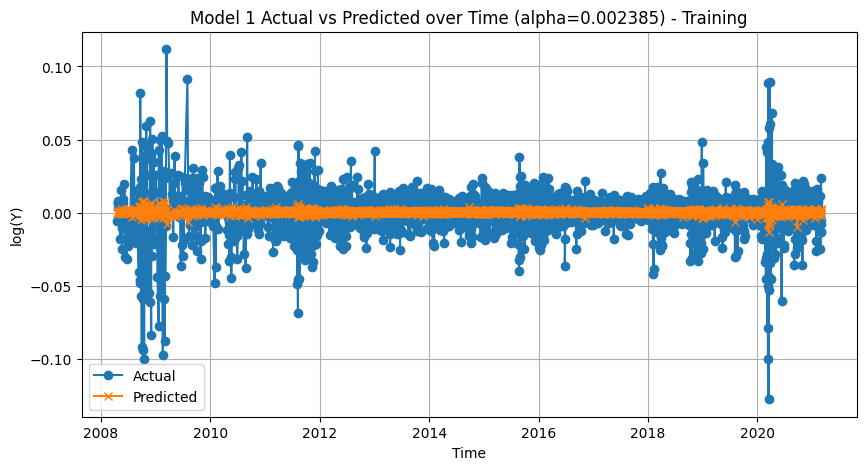


Model 2 with alpha=0.001931 (Training Data)


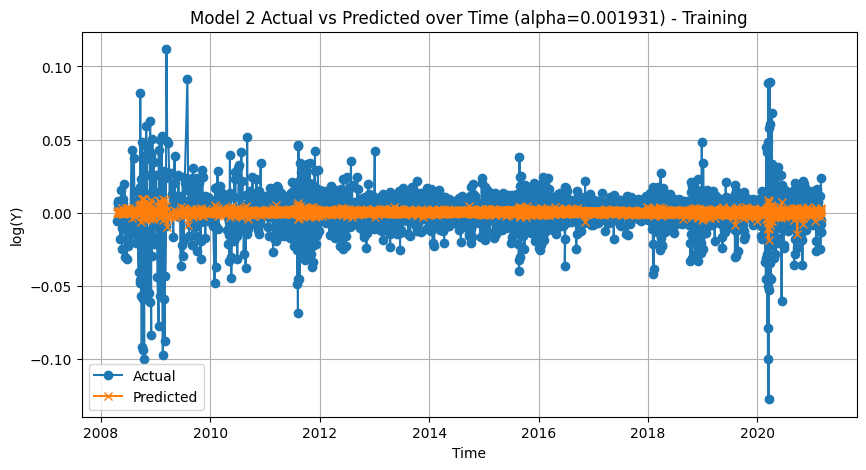


Model 3 with alpha=0.001563 (Training Data)


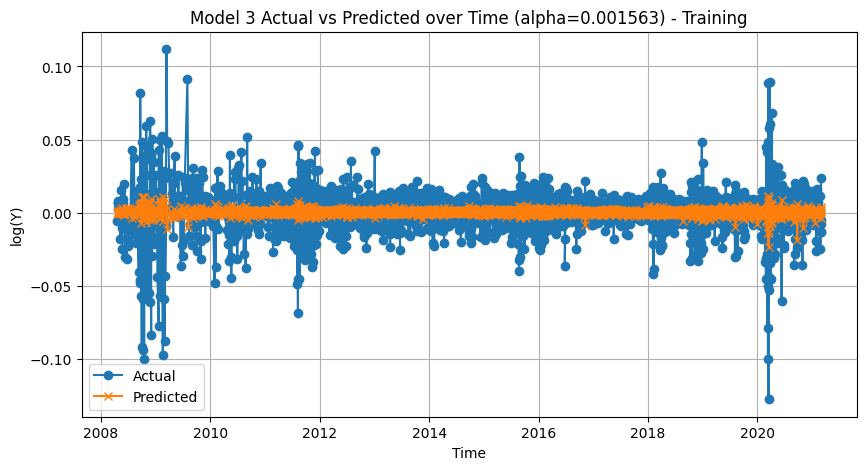

In [44]:
for i, model_info in enumerate(top_models):
    alpha = model_info['alpha']
    print(f"\nModel {i+1} with alpha={alpha:.6f} (Training Data)")

    # Fit model on full training data
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_weighted, log_y_clean)

    # Predict on training data
    y_pred_train = lasso.predict(X_weighted)

    # Compute metrics on training data (optional)...

    # Plot actual and predicted over time using index as time
    plt.figure(figsize=(10,5))
    plt.plot(X_weighted.index, log_y_clean, label='Actual', marker='o')
    plt.plot(X_weighted.index, y_pred_train, label='Predicted', marker='x')
    plt.xlabel('Time')
    plt.ylabel('log(Y)')
    plt.title(f'Model {i+1} Actual vs Predicted over Time (alpha={alpha:.6f}) - Training')
    plt.legend()
    plt.grid(True)
    plt.show()


Evaluating Model 1 with alpha=0.002385
AIC (holdout): -6064.9883, BIC (holdout): -6024.3160, R^2 (holdout): -0.0032


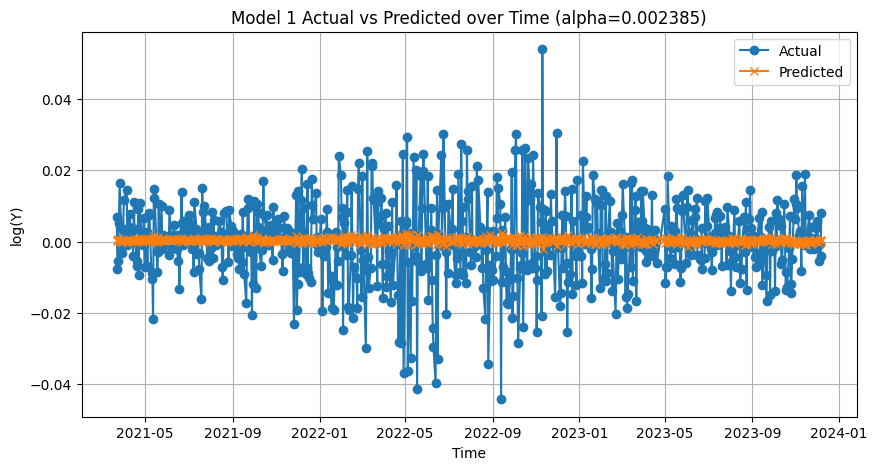


Evaluating Model 2 with alpha=0.001931
AIC (holdout): -6064.9883, BIC (holdout): -6024.3160, R^2 (holdout): -0.0032


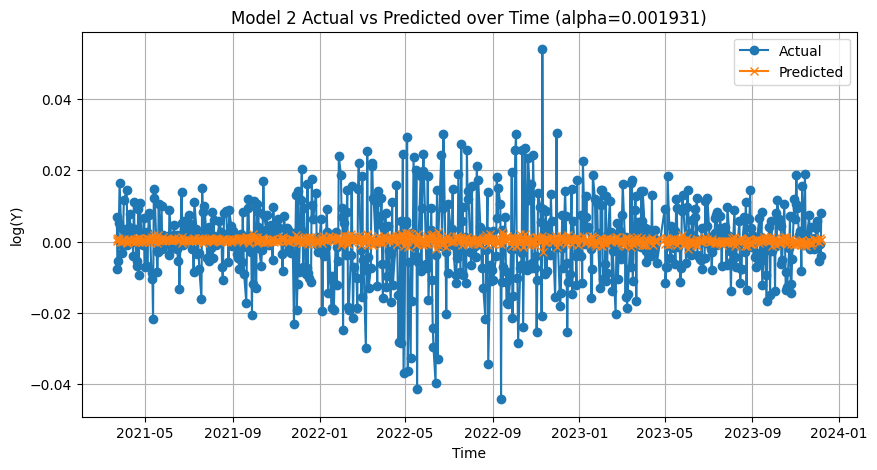


Evaluating Model 3 with alpha=0.001563
AIC (holdout): -6064.9883, BIC (holdout): -6024.3160, R^2 (holdout): -0.0032


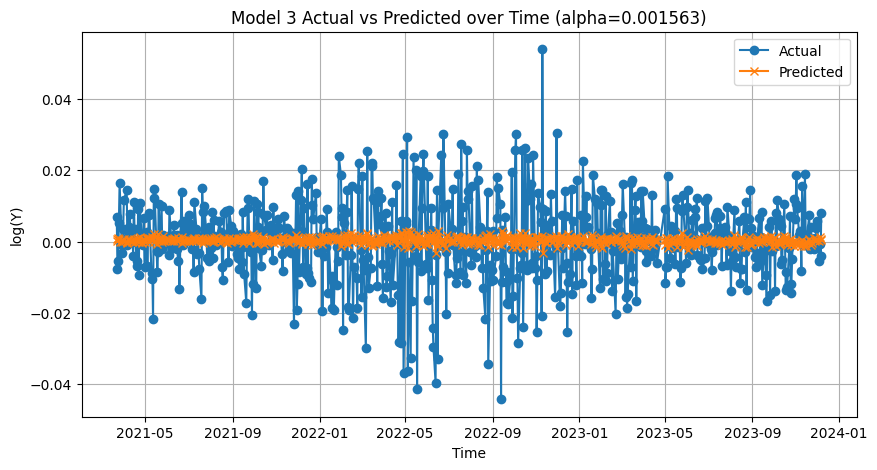

In [45]:
for i, model_info in enumerate(top_models):
    alpha = model_info['alpha']
    print(f"\nEvaluating Model {i+1} with alpha={alpha:.6f}")

    # Fit model on full training data again
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_weighted, log_y_clean)

    # Predict on holdout with full features 
    y_pred_holdout = lasso.predict(X_holdout_scaled)

    # Compute metrics on holdout

    print(f"AIC (holdout): {aic_holdout:.4f}, BIC (holdout): {bic_holdout:.4f}, R^2 (holdout): {r2_holdout:.4f}")

    # Plot actual and predicted over time using index as time
    plt.figure(figsize=(10,5))
    plt.plot(X_holdout_scaled.index, log_y_holdout_clean, label='Actual', marker='o')
    plt.plot(X_holdout_scaled.index, y_pred_holdout, label='Predicted', marker='x')
    plt.xlabel('Time')
    plt.ylabel('log(Y)')
    plt.title(f'Model {i+1} Actual vs Predicted over Time (alpha={alpha:.6f})')
    plt.legend()
    plt.grid(True)
    plt.show()